In [225]:
import pandas as pd 
import numpy as np

In [226]:
pwd

'/home/ujjwal/ujjwal/kmeans/assigiment-keamns'

In [227]:
datasets = pd.read_csv('../data/IPL_Ball_by_Ball_2008_2022.csv')

In [228]:
datasets.shape

(225954, 17)

In [229]:
datasets.tail(3)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225953,335982,2,15,2,SB Joshi,LR Shukla,P Kumar,NaN,0,0,0,0,1,SB Joshi,caught,BB McCullum,Royal Challengers Bangalore


In [230]:
datasets.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [231]:
df = datasets.drop('ID' , axis= 1 )

In [232]:
df = df.reset_index()

In [233]:
df['batter'].value_counts().index 
#Their are 605 batter from where we are removing batsman who had played less than 100 balls 

Index(['V Kohli', 'S Dhawan', 'RG Sharma', 'DA Warner', 'SK Raina',
       'RV Uthappa', 'MS Dhoni', 'G Gambhir', 'CH Gayle', 'AB de Villiers',
       ...
       'PN Mankad', 'C Nanda', 'Yash Dayal', 'DP Vijaykumar', 'Sunny Gupta',
       'S Lamichhane', 'JL Denly', 'NJ Rimmington', 'Y Prithvi Raj',
       'V Pratap Singh'],
      dtype='object', name='batter', length=605)

In [234]:
df['batter'].value_counts()  > 100

batter
V Kohli            True
S Dhawan           True
RG Sharma          True
DA Warner          True
SK Raina           True
                  ...  
S Lamichhane      False
JL Denly          False
NJ Rimmington     False
Y Prithvi Raj     False
V Pratap Singh    False
Name: count, Length: 605, dtype: bool

In [235]:
eligiable_batter = df['batter'].value_counts()[df['batter'].value_counts() > 100 ].index

In [236]:
eligiable_batter

Index(['V Kohli', 'S Dhawan', 'RG Sharma', 'DA Warner', 'SK Raina',
       'RV Uthappa', 'MS Dhoni', 'G Gambhir', 'CH Gayle', 'AB de Villiers',
       ...
       'SE Rutherford', 'RJ Quiney', 'UT Khawaja', 'AB McDonald', 'DJ Harris',
       'SL Malinga', 'B Lee', 'DJM Short', 'RD Chahar', 'DJ Jacobs'],
      dtype='object', name='batter', length=265)

In [237]:
df

,index,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,0,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,2,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,3,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,4,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,225949,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,225950,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,225951,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,225952,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [238]:

df['batter'].isin(eligiable_batter)

0          True
1          True
2          True
3          True
4          True
          ...  
225949     True
225950    False
225951     True
225952    False
225953    False
Name: batter, Length: 225954, dtype: bool

In [239]:
new_df = df[df['batter'].isin(eligiable_batter)]
new_df

,index,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,0,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,2,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,3,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,4,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225942,225942,2,13,4,P Kumar,SC Ganguly,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225943,225943,2,13,5,P Kumar,SC Ganguly,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225944,225944,2,13,6,P Kumar,SC Ganguly,SB Joshi,NaN,6,0,6,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225949,225949,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [240]:
#batting average  = totals runs / no of times out 
# total runs 
total_runs = new_df.groupby('batter')['total_run'].sum()
print("total runs is ")

print(f"\n {total_runs} ")

no_of_times_out = new_df.groupby('batter')['player_out'].count()
print(f"\n\n {no_of_times_out}")


total runs is 

 batter
A Ashish Reddy      288
A Badoni            173
A Mishra            402
A Symonds          1028
AA Jhunjhunwala     235
                   ... 
YBK Jaiswal         567
YK Pathan          3385
YV Takawale         207
Yuvraj Singh       2884
Z Khan              121
Name: total_run, Length: 265, dtype: int64 


 batter
A Ashish Reddy      15
A Badoni             9
A Mishra            30
A Symonds           26
AA Jhunjhunwala     14
                  ... 
YBK Jaiswal         23
YK Pathan          111
YV Takawale          8
Yuvraj Singh       109
Z Khan              15
Name: player_out, Length: 265, dtype: int64


In [241]:
batting_average  = total_runs / no_of_times_out 
batting_average

batter
A Ashish Reddy     19.200000
A Badoni           19.222222
A Mishra           13.400000
A Symonds          39.538462
AA Jhunjhunwala    16.785714
                     ...    
YBK Jaiswal        24.652174
YK Pathan          30.495495
YV Takawale        25.875000
Yuvraj Singh       26.458716
Z Khan              8.066667
Length: 265, dtype: float64

In [242]:
#calculate the  strike rate
ball_faced = new_df.groupby('batter')['batter'].value_counts()
#strike rate  = (total runs / ball faced ) * 100 |
strike_rate = (total_runs / ball_faced) * 100
strike_rate

batter
A Ashish Reddy     146.938776
A Badoni           124.460432
A Mishra            98.048780
A Symonds          131.626120
AA Jhunjhunwala    107.798165
                      ...    
YBK Jaiswal        138.292683
YK Pathan          145.029991
YV Takawale        113.114754
Yuvraj Singh       130.675125
Z Khan              85.815603
Length: 265, dtype: float64

In [243]:
type(strike_rate)

pandas.core.series.Series

In [244]:
strike_rate_df = strike_rate.to_frame().reset_index().rename(columns={'index': 'Batsman', 0: 'StrikeRate'})

In [245]:
batting_average_dff = batting_average.to_frame().reset_index(drop = True ) .rename(columns={0:'batting_average'})

In [246]:
final_dff = pd.concat([strike_rate_df , batting_average_dff] , axis  = 1 )
final_dff.shape


(265, 3)

In [247]:
#converting  into array 
X = final_dff.iloc[: , 1: ].values

Text(0.5, 1.0, 'IPL Batsman  ')

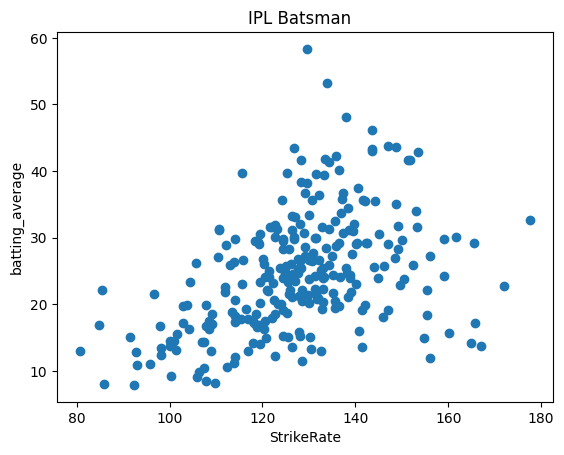

In [248]:
#plotting 
import matplotlib.pyplot as plt 
plt.scatter(X[: ,0 ] ,X[:  , 1 ])
plt.xlabel(final_dff.columns[1])
plt.ylabel(final_dff.columns[2])
plt.title("IPL Batsman  ")

In [249]:
#doing elbow method 
from sklearn.cluster import KMeans

wcss = []
for i in range(1 , 11):
    kmeans = KMeans(n_init = 10 , n_clusters = i ) 
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [250]:
wcss

[92791.9991615403,
 46029.48899073945,
 30053.38304764142,
 22451.031926049633,
 17856.03271457822,
 15276.22047416016,
 13188.742335504572,
 11565.501532630224,
 10305.82058602156,
 9132.90143585043]

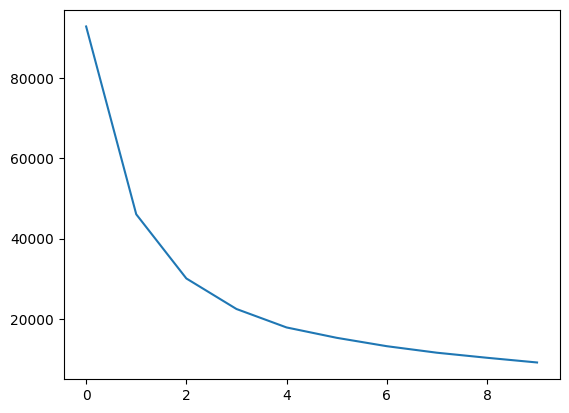

In [251]:
plt.plot(wcss)

In [256]:
kmeans = KMeans(n_init = 20 , n_clusters = 4 )

In [258]:
y_kmeans  = kmeans.fit_predict(X)
y_kmeans

array([2, 3, 1, 0, 1, 3, 3, 2, 0, 0, 3, 3, 2, 0, 0, 3, 3, 3, 3, 3, 3, 0,
       2, 0, 3, 3, 3, 1, 3, 0, 0, 0, 3, 2, 0, 0, 2, 3, 0, 3, 0, 1, 2, 2,
       3, 1, 0, 3, 2, 2, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 1, 3, 3, 3, 0, 0,
       0, 1, 3, 1, 0, 3, 0, 3, 0, 3, 1, 3, 2, 3, 3, 2, 0, 3, 2, 3, 0, 3,
       2, 2, 2, 0, 3, 1, 3, 3, 0, 0, 2, 3, 0, 0, 0, 1, 2, 1, 2, 3, 0, 0,
       3, 0, 3, 0, 3, 0, 3, 1, 0, 0, 3, 3, 2, 3, 1, 1, 3, 3, 3, 0, 0, 0,
       1, 3, 0, 2, 1, 0, 2, 3, 3, 3, 0, 2, 1, 1, 0, 0, 3, 3, 0, 3, 0, 3,
       2, 1, 2, 0, 1, 1, 2, 3, 0, 1, 1, 3, 3, 1, 2, 3, 0, 2, 3, 1, 2, 0,
       3, 3, 3, 3, 1, 3, 2, 3, 0, 3, 0, 0, 1, 0, 3, 0, 1, 1, 3, 0, 2, 2,
       3, 1, 0, 2, 0, 3, 0, 0, 1, 3, 0, 0, 0, 1, 3, 0, 3, 0, 1, 1, 2, 0,
       3, 0, 3, 2, 3, 1, 2, 0, 0, 0, 0, 3, 2, 3, 0, 3, 3, 3, 3, 3, 0, 1,
       3, 3, 3, 0, 0, 1, 3, 1, 0, 2, 3, 3, 1, 1, 0, 3, 3, 3, 0, 2, 3, 0,
       1], dtype=int32)

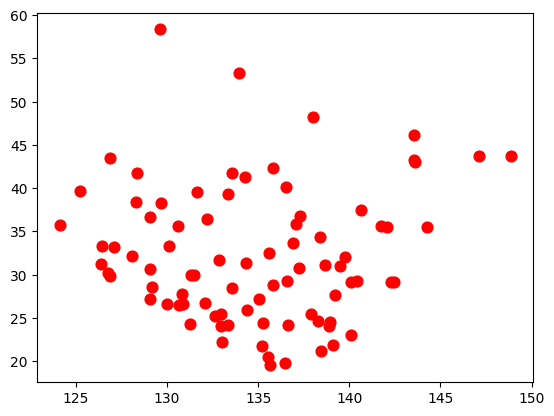

In [259]:
plt.scatter(X[y_kmeans == 0 , 0] , X[y_kmeans == 0 , 1 ] , s = 60  , c = 'red' , label = "clustering 1 ")

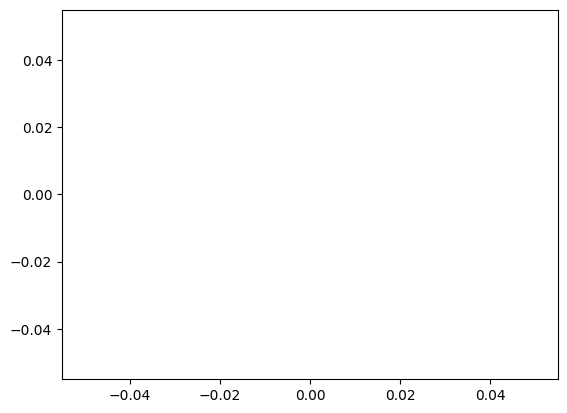

In [260]:
plt.scatter(X[kmeans ==  1 , 0 ] , X[kmeans == 1 , 1 ])

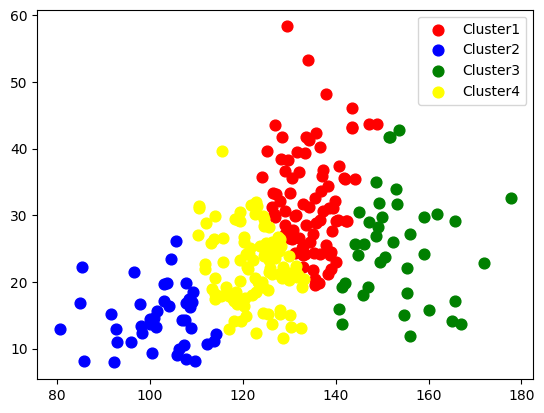

In [261]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'yellow', label = 'Cluster4')

plt.legend()

plt.show()
